In [1]:
import sys

package_path: str = '..'
if package_path not in sys.path:
    sys.path.append(package_path)

In [2]:
%reload_ext autoreload
%autoreload 2

In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
from roi_rectangle import RoiRectangle

from src.analyzer.loader import MatLoader
from src.config.config import load_config

In [8]:
run_n: int = 202
config = load_config()
mat_file = os.path.join(
    config.path.mat_dir,
    f"run={run_n:04}_scan=0001_poff.mat"
)

images = MatLoader(mat_file).images
print(f"{images.shape = }")
print(f"{images.mean() = }")
print(f"{images.min() = }")
print(f"{images.max() = }")

images.shape = (81, 514, 1030)
images.mean() = 0.09804779
images.min() = 0.0
images.max() = 52.171326


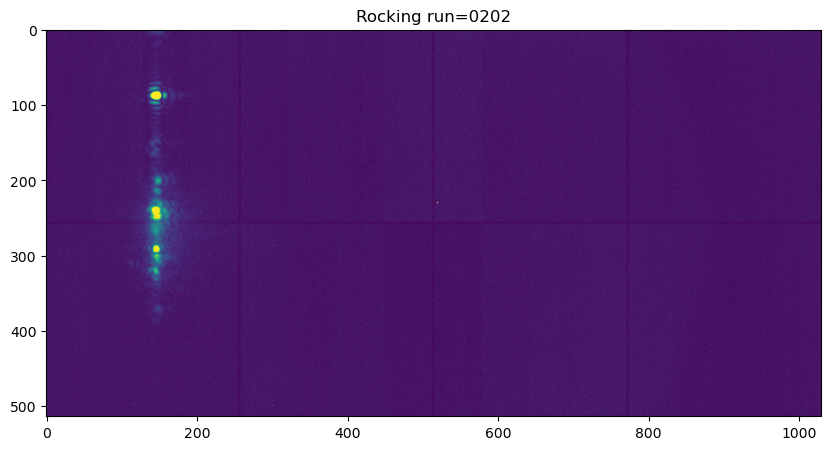

In [9]:
images = np.maximum(images, 0)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(np.log1p(images[40]), vmin=0, vmax=1.5)
ax.set_title(f"Rocking run={run_n:04}");

(81, 110, 100)

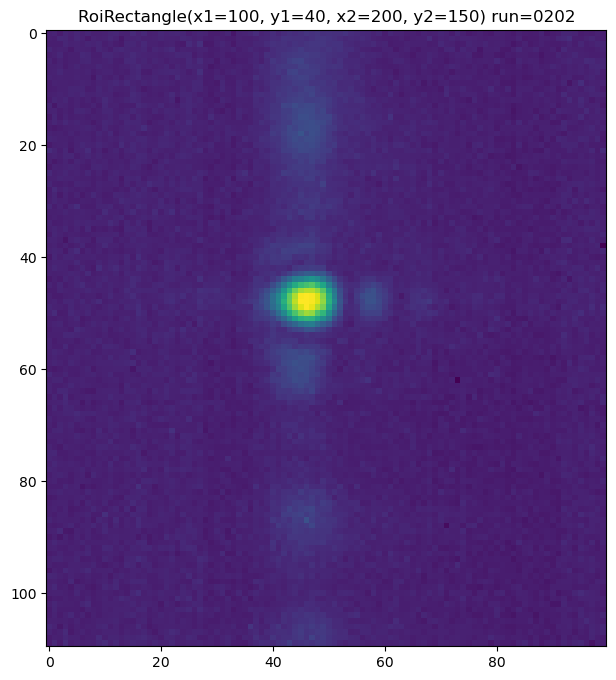

In [16]:
roi_rect = RoiRectangle(100, 40, 200, 150)
roi_images = roi_rect.slice(images)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(np.log1p(roi_images.mean(axis=0)), vmin=0, vmax=1)
ax.set_title(f"{roi_rect} run={run_n:04}")

roi_images.shape

In [40]:
z = np.arange(0, roi_images.shape[0])
result = (z[:, np.newaxis, np.newaxis] * roi_images)
result = np.divide(result, roi_images.sum(0)[np.newaxis, :, :], where=(roi_images.sum(0)[np.newaxis, :, :] != 0), out=np.full_like(result, np.nan))
roi_images.shape[0]

81

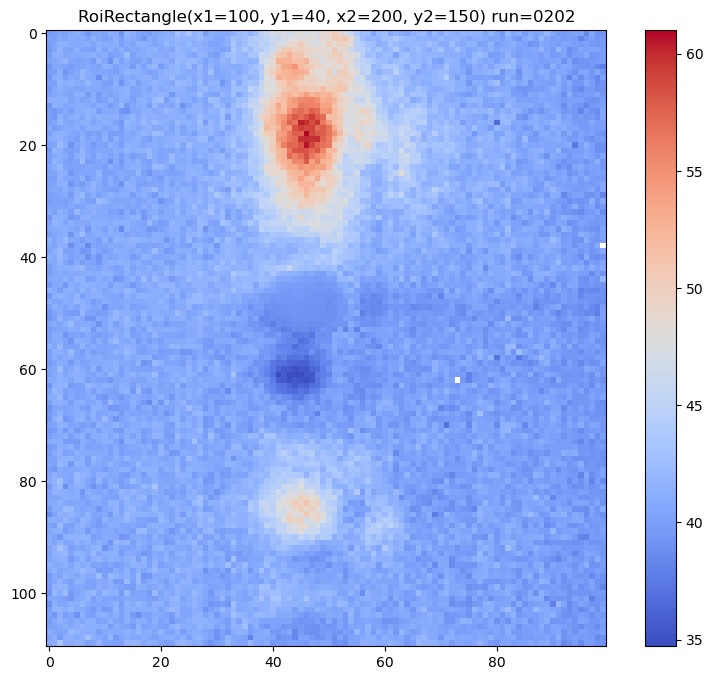

In [41]:
from matplotlib.colors import TwoSlopeNorm

# 평균 계산 (여기서는 첫 번째 축에 대한 평균)
mean_result = result.sum(axis=0)

# 색상 맵의 중앙값을 40으로 설정
vmin = mean_result.min()
vmax = mean_result.max()
center_value = 40

# TwoSlopeNorm을 사용하여 중앙값 설정
norm = TwoSlopeNorm(vmin=vmin, vcenter=center_value, vmax=vmax)

# 색상 맵을 적용하여 이미지 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
cax = ax.imshow(mean_result, cmap='coolwarm', norm=norm)  # 'coolwarm' 색상 맵 사용
ax.set_title(f"{roi_rect} run={run_n:04}")

# 색상 바 추가
fig.colorbar(cax, ax=ax)

(array([38, 62], dtype=int64), array([99, 73], dtype=int64))